<a href="https://colab.research.google.com/github/ojasviG/fakenews/blob/main/FakeNNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the data
df=pd.read_csv('newsBiagi.csv')
#url = 'copied_raw_GH_link'
#df1 = pd.read_csv(url)
#Get shape and head

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# EDA

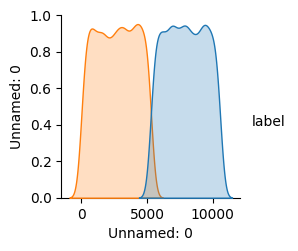

In [ ]:
sns.pairplot(df, hue='label')

In [ ]:
df.groupby('label').describe()

Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
FAKE      3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
REAL      3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
FAKE   10557.0  
REAL    5276.0

In [ ]:
df['length']=df['text'].apply(len)

<Axes: ylabel='Frequency'>

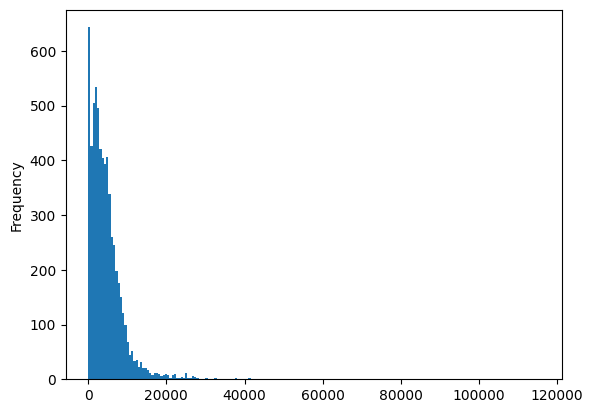

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['length'].plot.hist(bins=200)

In [ ]:
df.shape

(6335, 4)

In [ ]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
df['length'].describe()

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: length, dtype: float64

array([<Axes: title={'center': 'FAKE'}>, <Axes: title={'center': 'REAL'}>],
      dtype=object)

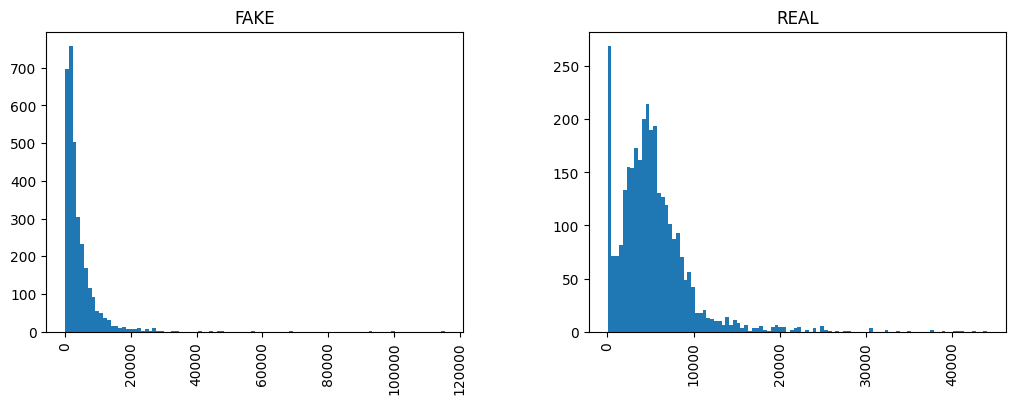

In [ ]:

df.hist(column='length',by='label', bins=100, figsize=(12,4))

#Preprocessing

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:

preprocessed_review = preprocess_text(df['text'].values)
df['text1'] = preprocessed_review

100%|██████████| 6335/6335 [09:08<00:00, 11.56it/s]


# Train Test Split and Feature engineering

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

# Tfidf Classifier Model

In [ ]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


In [ ]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 41, 588]])

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['label'],
                                                    test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [ ]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.8238636363636364


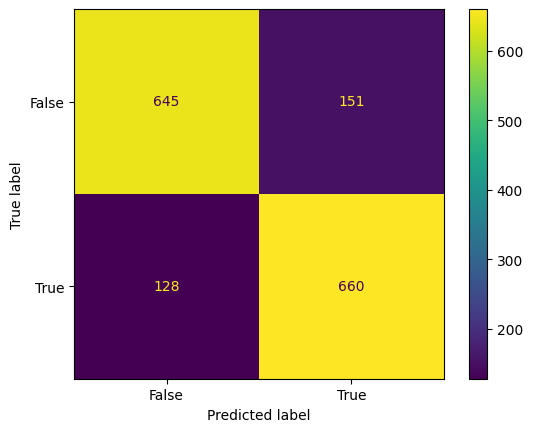

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

# Justification on selecting the supervise and unsupervised methods
For classification tasks, such as fake news detetcion when labelled data is available, we use supervised learning, as the quaity of results in unsupervised learning are only useful when labelled or annotated data is unavailable for a large dataset

# Do some initial analysis on the dataset

please refer to code blocks after the text EDA

# Have a small discussion of what type of pre-processing is needed

As we can see from the sample we've seen in the df.head and describe part of the EDA, we need to clean the data for it to make sense and reduce the noise. We need to remove null characters, spaces, and stopwords

# Pre-processing with explanation

Please refer to code blocks after Preprocessing



# Feature engineering and justification
Please refer to code blocks after Train Test Split and Feature Engineering text box

# Follow the ML pipeline in your process and clearly explain each step
The following has been my ML Pipeline steps
- Load Data
- Clean Data/preprocessing data
- EDA
- Train Test Data
- Model Fitting
- Prediction
- Evaluate Model performance
- Model Tuning (which we couldnt here due to paucity of time)

# Discuss the results and explain which approach is better, why? and how the results could be improved

Using the TFIDF's Passive Aggressive classifier had ease of use as the passive-aggressive algorithms are a family of algorithms for large-scale learning, and hence model computation was not difficult.

For Decision Tree, we had to preprocess the data significantly and that took time and compute power.

Overall, Decision Tree method gave worse accuracy as you can see that it overfit during the training phase, which is why Tfidf's Passive Aggressive Classifier performed better.


For decision tree, we could maybe use bagged/bootstrapped aggregation to find the highly correlated features.

But a better approach would be to use Random Forest Classifier since it randomly removes one feature and decorrelates the Trees.

# Explain what potential ethical concerns you can infer in this task and how would you approach them

An unbalanced corpus or a biased dataset ca result in misclassfication and has strong ramifications on the results. Since classifiers for Fake News can affect amplify misinformation, propagate discrimination against marginalised communities and possibly create political and social harm, I would propose studying the data for fairness and also interpreting and explaining the results through Explainable AI toolkits by IBM and Microsoft